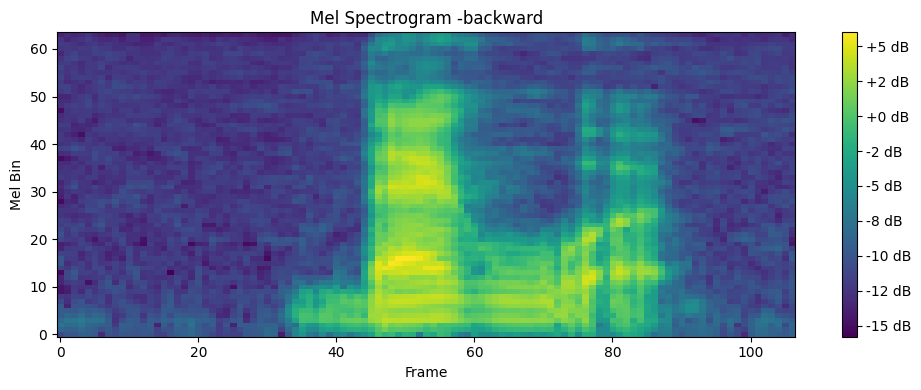

In [87]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 4))
plt.imshow(np.log(mel_spectrogram.squeeze().numpy()+1e-9), origin='lower', aspect='auto', cmap='viridis')
plt.title(f'Mel Spectrogram -{label}')   
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Frame')
plt.ylabel('Mel Bin')
plt.tight_layout()
plt.show()

In [1]:
import datasets
import torch
import lightning as L
from models.test_model import MambaModel
from utils.modules import LightningMamba
from config import get_config
from torch.optim.lr_scheduler import LambdaLR
from utils.utils import set_seed, model_summary

/media/data/tmpoulionis/miniconda3/envs/nn_mamba/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ImportError: /media/data/tmpoulionis/miniconda3/envs/nn_mamba/lib/python3.10/site-packages/selective_scan_cuda.cpython-310-x86_64-linux-gnu.so: undefined symbol: _ZN3c104cuda9SetDeviceEab

In [2]:
config = get_config()
MODEL_CONFIG = config["model"]
TRAINER_CONFIG = config["trainer"]
DATASET_CONFIG = config["dataset"]
OPTIMIZER_CONFIG = config["optimizer"]

# ------- Load Dataset and create DataLoaders -------
data = datasets.get_dataloaders(**DATASET_CONFIG)
train_loader = data["train_loader"]
val_loader = data["val_loader"]
test_loader = data["test_loader"]
num_classes = data["num_classes"]
if TRAINER_CONFIG["max_epochs"] is not None:
    total_steps = len(train_loader) * TRAINER_CONFIG["max_epochs"]
    if TRAINER_CONFIG["max_steps"] is not None:
        total_steps = min(total_steps, TRAINER_CONFIG["max_steps"])
else:
    try:
        total_steps = TRAINER_CONFIG["max_steps"]
    except: 
        raise ValueError("Either max_steps or max_epochs must be defined.")
    
print(f"  ✓ Dataset: {DATASET_CONFIG["dataset_name"]}")
print(f"  ✓ Classes: {data["num_classes"]}")
print(f"  ✓ Input shape: {data['input_shape']}")
print(f"  ✓ Features: {data['feature_dim']}")
print(f"  ✓ Sequence Length: {data['sequence_length']}")
    

Loading sc09 dataset...
Creating DataLoaders...
Dataloaders created.
  ✓ Dataset: sc09
  ✓ Classes: 10
  ✓ Input shape: torch.Size([64, 107])
  ✓ Features: 64
  ✓ Sequence Length: 107


In [ ]:
# ------- Create Model -------
print("Constructing Model...")
model = MambaModel(**MODEL_CONFIG, d_out=num_classes)
model_summary(model)

Constructing Model...


NameError: name 'MambaModel' is not defined